# 2. Quasi Monte Carlo Methods

## 2.1 Key Concepts

Quasi Monte Carlo (QMC) methods use (deterministic) number sequences, known as $\textit{low-discrepancy}$ sequences, instead of random sampling to achieve faster convergence rates. These sequences are designed to cover the sample space more uniformly than purely random samples.

One common low-discrepancy sequence is the Sobol sequence. We consider here the problem from section 1.2, i.e. the estimation of the integral of $f(x) = \sin(2\pi x)$ over the interval $[0,1]$.

In the following we will use the $\textit{scipy.stats.qmc}$ module to generate Sobol sequence samples and compare it to the standard MC method.

In [1]:
# to do: add definition of sobol points

Monte Carlo mean: 0.003696645653952448
Quasi-Monte Carlo mean: 2.660662494144428e-09
Expected mean: 0
Monte Carlo mean: 0.003696645653952448
Quasi-Monte Carlo mean: 2.660662494144428e-09
Expected mean: 0


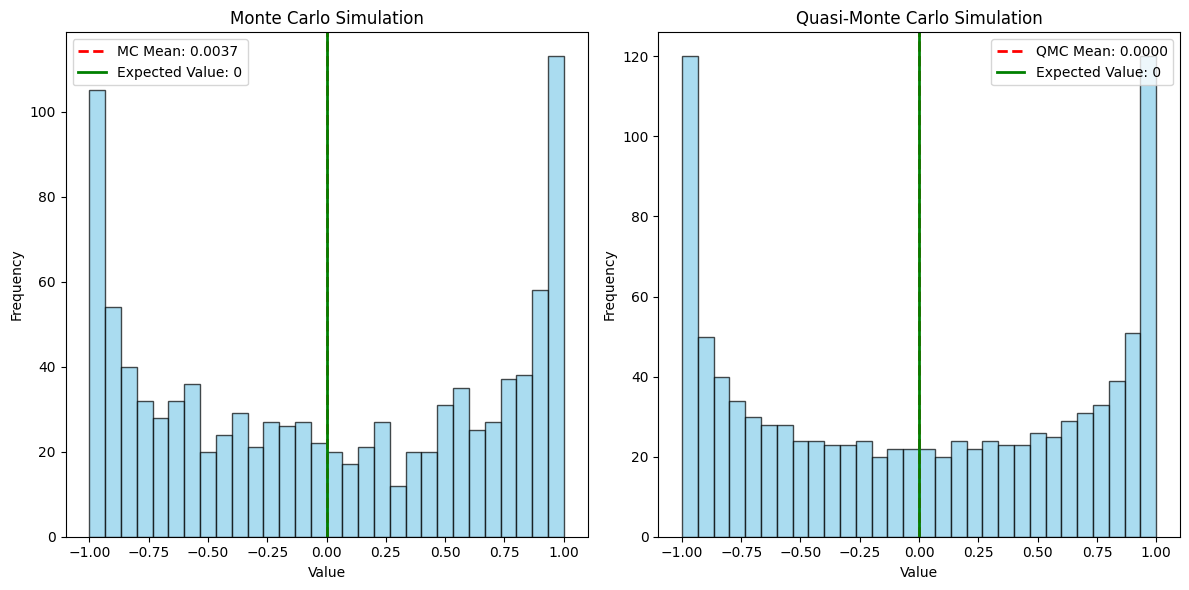

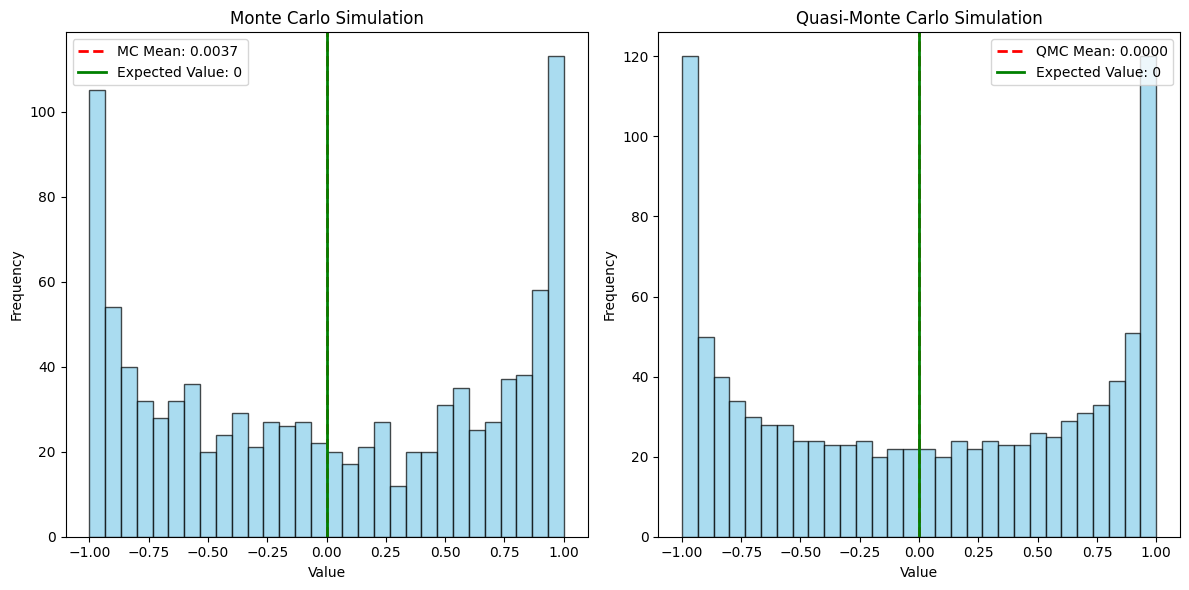

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.qmc import Sobol

# Define the function to integrate
def f(x):
    return np.sin(2 * np.pi * x)

# Number of samples
N = 1024

# Monte Carlo simulation
mc_samples = np.random.rand(N) # generate N random samples from a uniform distribution over [0, 1]
mc_values = f(mc_samples) # calculate function values of the generated samples
mc_mean = np.mean(mc_values) # calculate the mean 

# Quasi-Monte Carlo simulation using Sobol sequence
sobol_engine = Sobol(d=1, scramble=True) # initialize the Sobol sequence generator
qmc_samples = sobol_engine.random(N).flatten() # Generate N Sobol sequence samples
qmc_values = f(qmc_samples) # calculate function values of the generated samples
qmc_mean = np.mean(qmc_values)  # calculate the mean 

# Expected value (integral of sin(2*pi*x) over [0, 1])
expected_value = 0

# Plotting
plt.figure(figsize=(12, 6))

# Monte Carlo
plt.subplot(1, 2, 1)
plt.hist(mc_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mc_mean, color='red', linestyle='dashed', linewidth=2, label=f'MC Mean: {mc_mean:.4f}')
plt.axvline(expected_value, color='green', linestyle='solid', linewidth=2, label='Expected Value: 0')
plt.title('Monte Carlo Simulation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Quasi-Monte Carlo
plt.subplot(1, 2, 2)
plt.hist(qmc_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(qmc_mean, color='red', linestyle='dashed', linewidth=2, label=f'QMC Mean: {qmc_mean:.4f}')
plt.axvline(expected_value, color='green', linestyle='solid', linewidth=2, label='Expected Value: 0')
plt.title('Quasi-Monte Carlo Simulation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Print the results
print(f"Monte Carlo mean: {mc_mean}")
print(f"Quasi-Monte Carlo mean: {qmc_mean}")
print(f"Expected mean: {expected_value}")

# Show plot
plt.tight_layout()
plt.show()

We note that the QMC method gives a closer (in terms of absolute error) estimation than the MC method.

## 2.2 UM-Bridge Integration

We give the UM-Bridge integration for a QMC client analogue to before. You have to run the model (see `MC.ipynb` class Testmodel) and then you can make a client request by executing this code.

```python
# umbridge client
import numpy as np
import umbridge
from scipy.stats.qmc import Sobol

model = umbridge.HTTPModel("http://localhost:4242", "forward")

N = 100 # Number of samples

## Quasi Monte Carlo simulation

# Generate N Sobol sequence samples and convert them to a list
sobol_engine = Sobol(d=1, scramble=True) # initialize the Sobol sequence generator
parameters = sobol_engine.random(N).tolist()
print("First ten parameters:", parameters[:10], "\n") # print first 10 parameters

qmc_values = [model([parameters])[0][0] for parameters in parameters]  # model evaluation for each parameter
print("First ten model evaluations:", qmc_values[:10], "\n")

qmc_mean = np.mean(qmc_values)  # calculate mean
print("QMC estimator:", qmc_mean, "\n")
```

Again you can see how the estimator is working for different sample sizes `N` or different functions. Just run the code in another file. If you want to estimate another integral, you have to make a change in the definied Testmodel class from the `MC.ipynb` file. Change the definition of `posterior` to another 1D function that you are interested in.